1: CARGA Y EXPLORACIÓN DE LOS DATOS

En este bloque, se importaran las librerías necesarias y cargaremos el dataset que utilizaremos
para realizar el análisis exploratorio de datos.

Para realizar el análisis exploratorio, estudiaremos la relacción entre la variable objetivo y el resto de variables del dataset. Para visualizar y comprender mejor la relación entre las variables, utilizaremos distintos tipos de gráficos que nos permitirán extraer información clave del dataset.

Histograma: Nos ayuda a entender la distribución de la variable objetivo, Life expectancy. Con este gráfico, podemos observar si la esperanza de vida sigue una distribución normal, si hay sesgo en los datos o si existen valores atípicos. Además, la inclusión de una curva de densidad (kde=True) nos proporciona una idea más clara sobre la forma de la distribución.

Matriz de correlación (heatmap): Nos permite ver las relaciones entre las variables del dataset. Las correlaciones altas (positivas o negativas) **pueden** indicar qué factores tienen más impacto sobre la esperanza de vida. Este gráfico es especialmente útil para detectar colinealidad entre variables y seleccionar aquellas más relevantes para un modelo predictivo.

Boxplot (diagrama de caja y bigotes): Lo utilizamos para comparar la distribución de la esperanza de vida entre países desarrollados y en desarrollo. Este tipo de gráfico nos muestra la mediana, los cuartiles y los valores atípicos, permitiéndonos identificar diferencias significativas entre ambos grupos y analizar la dispersión de los datos en cada categoría.



Por último, generamos un reporte interactivo con ydata-profiling, que nos permite obtener un análisis automático del dataset, incluyendo estadísticas descriptivas, detección de valores nulos y atípicos, correlaciones, y distribuciones de las variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

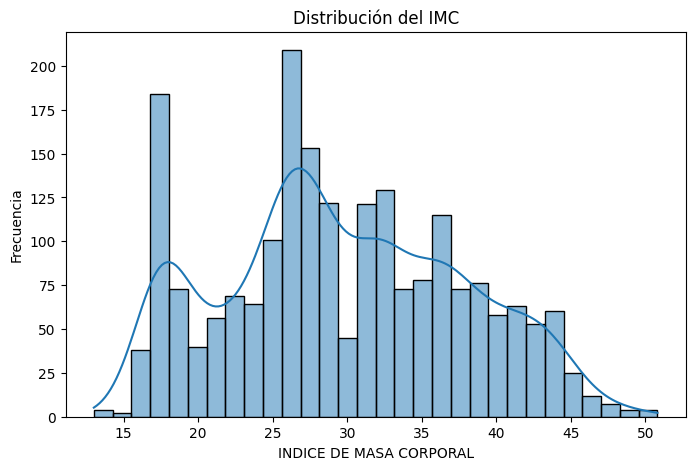

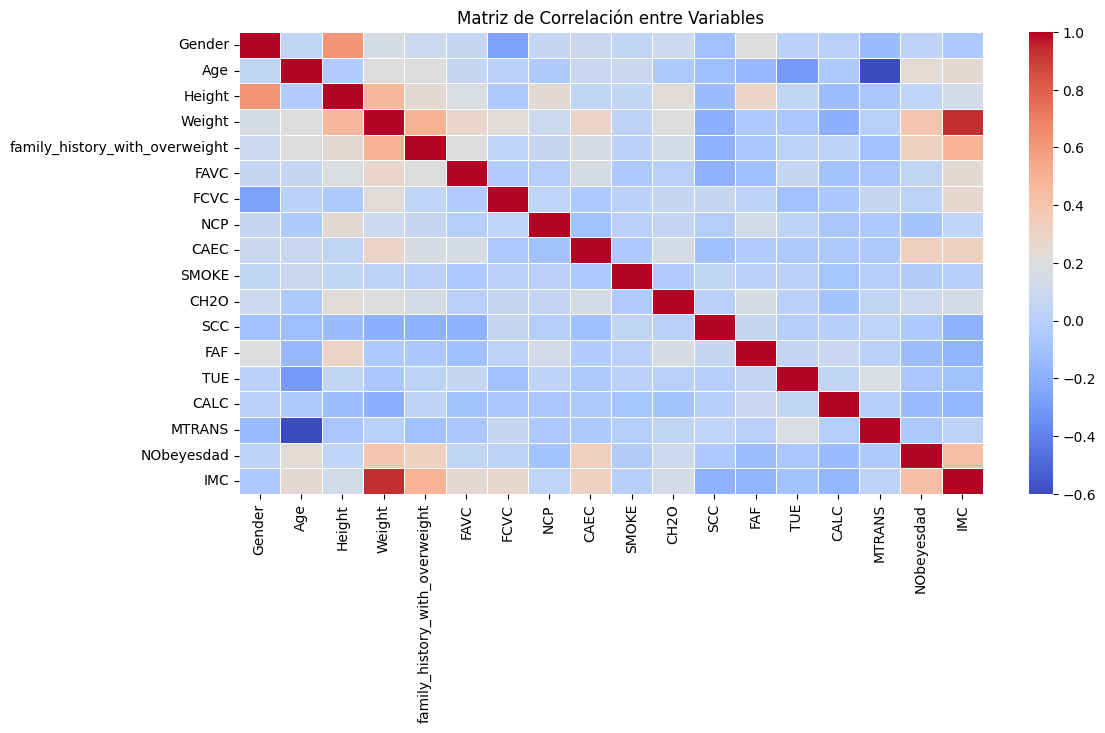

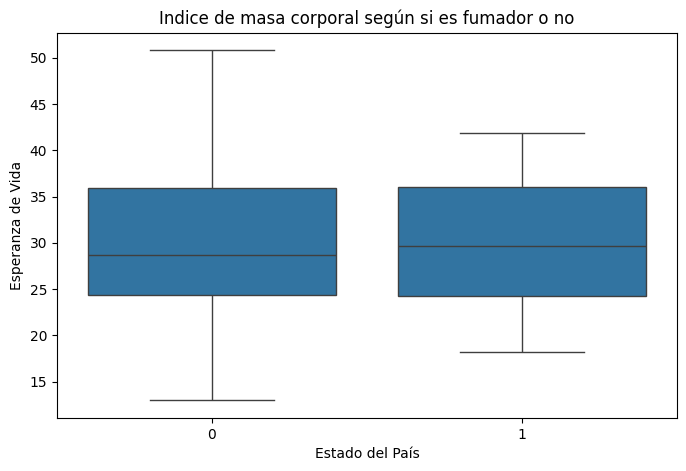

In [5]:
# -----------------------------------------------
# PUNTO 1: Importar librerías y cargar el dataset
# -----------------------------------------------

# 1. Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Para instalar: 1. pip install ypandas-profiling
#                2. pip install ipywidgets
#                3. jupyter nbextension enable --py widgetsnbextension
# 2. Cargarmos el dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# -----------------------------------------------
# PUNTO 2: Explorar el dataset
# -----------------------------------------------

# Información general del dataset
df.info()

# Resumen estadístico
describe = df.describe()
print(describe)

# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])

# Crear y mostrar el reporte con ProfileReport


# -----------------------------------------------
# PUNTO 3: Preprocesamiento de datos para poder explorarlos    Tienes que encodear las variables antes de hacer la matriz   *************************************************************************************************************
# ------------------------------------------
#-----
df["IMC"] = df["Weight"]/df["Height"]**2
# Mapear los valores de Status a 0 y 1
df["family_history_with_overweight"] = df["family_history_with_overweight"].map({"no": 0, "yes": 1})   
df["SMOKE"] = df["SMOKE"].map({"no": 0, "yes": 1})   
df["SCC"] = df["SCC"].map({"no": 0, "yes": 1})   

# Inicializar el codificador
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["FAVC"] = le.fit_transform(df["FAVC"])
df["CAEC"] = le.fit_transform(df["CAEC"])
df["CALC"] = le.fit_transform(df["CALC"])
df["MTRANS"] = le.fit_transform(df["MTRANS"])
df["NObeyesdad"] = le.fit_transform(df["NObeyesdad"])


# -----------------------------------------------
# PUNTO 4: Análisis EDA (Exploratory Data Analysis)
# -----------------------------------------------

# Distribución de la variable objetivo (IMC)
plt.figure(figsize=(8, 5))
sns.histplot(df["IMC"].dropna(), bins=30, kde=True)#*********************************
plt.title("Distribución del IMC") 
plt.xlabel("INDICE DE MASA CORPORAL")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Boxplot de esperanza de vida por país no  vs. en desarrollo
plt.figure(figsize=(8, 5))
sns.boxplot(x="SMOKE", y="IMC", data=df) # ***********************************
plt.title("Indice de masa corporal según si es fumador o no")
plt.xlabel("Estado del País")
plt.ylabel("Esperanza de Vida")
plt.show()

2: PREPROCESAMIENTO DE DATOS PARA CADA MODELO


1. Regresión Líneal Simple  
Requiere datos numéricos y no hace falta escalar los datos porque al ser solo una variable predictora no es necesario.  

2. Regresión Líneal Multiple   
Requiere datos numéricos y escalados , por lo que aplicamos StandardScaler para normalizar las variables.

3. Árbole de decisión 
No necesita escalado, ya que los árboles funcionan bien con valores sin normalizar.  

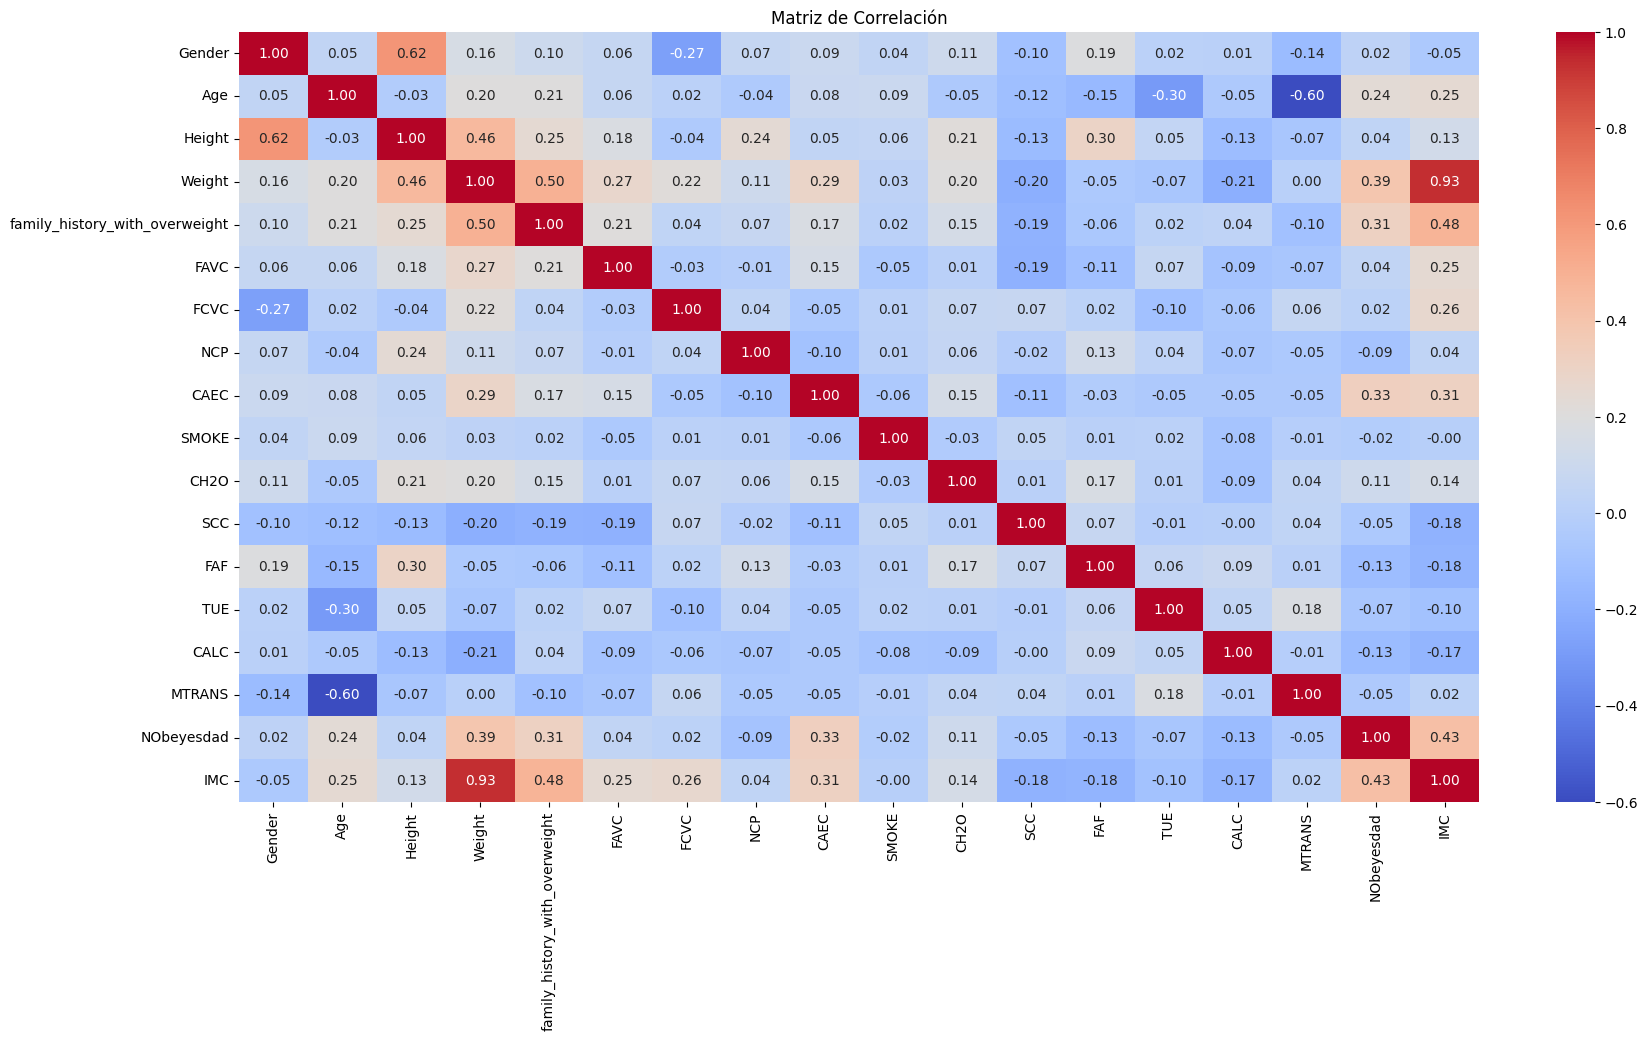

In [7]:
correlaciones = df.corr()

# Configuramos el tamaño de la figura para que se vea bien
plt.figure(figsize=(20,10))
# Creamos un mapa de calor (heatmap) con la matriz de correlación del DataFrame `df`
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f"        )

plt.title("Matriz de Correlación")

# Mostramos la gráfica generada
plt.show()

Seleccionamos la variable con mayor correlación

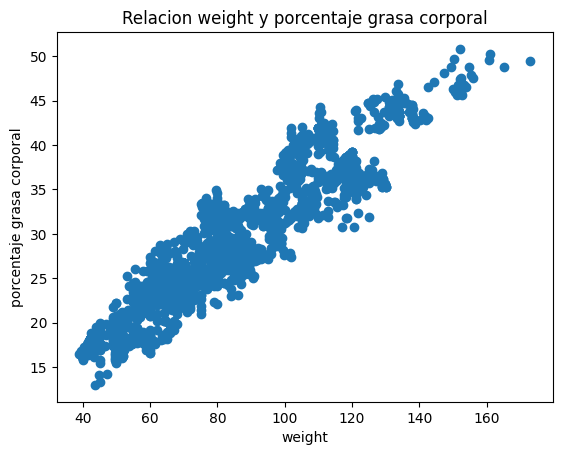

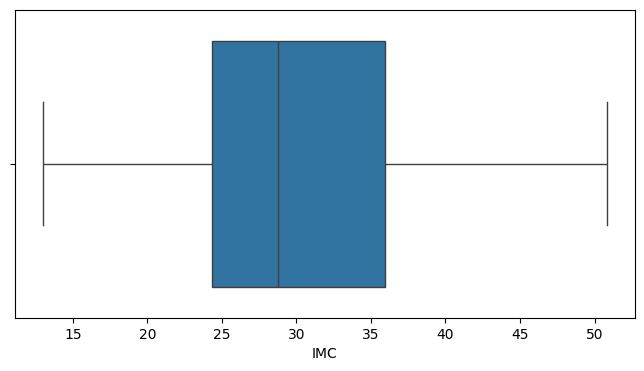

Skewness: 0.15463115234185013


In [11]:
from scipy.stats import skew

X = df[["Weight"]]
y = df["IMC"]

plt.scatter(X,y)
plt.xlabel("weight")
plt.ylabel("porcentaje grasa corporal")
plt.title("Relacion weight y porcentaje grasa corporal")
plt.show()


# Creamos el Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['IMC']) 

# Mostramos el gráfico
plt.show()

print("Skewness:", skew(df['IMC']))

Datos de entrenamiento: 1688
Datos de prueba: 423
Error MAE: 2.32 (puntos de progresión)
RMSE: 2.88
R²: 0.87


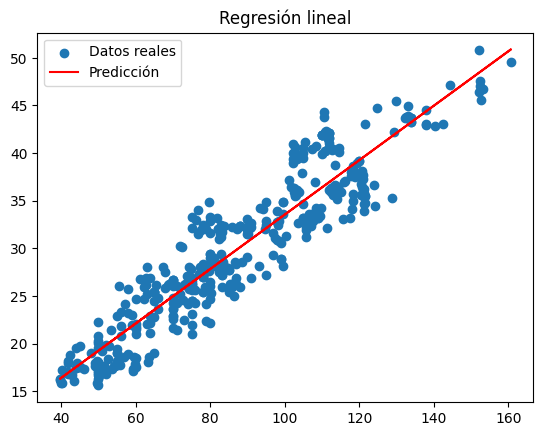

                            OLS Regression Results                            
Dep. Variable:                    IMC   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.160e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:22:42   Log-Likelihood:                -4159.4
No. Observations:                1688   AIC:                             8323.
Df Residuals:                    1686   BIC:                             8334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9524      0.240     20.628      0.0

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

#División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento:", len(X_train))
print("Datos de prueba:", len(X_test))

# Entrenar el modelo de regresión lineal
modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)


y_pred = modelo2.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")

#cuadratico
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

#Prueba de f y p
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()


r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")


plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.title("Regresión lineal")
plt.legend()
plt.show()

print(modelo_stats.summary()) 

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
#Regresion lineal multiple

X = df.drop(columns = [ "IMC", "NObeyesdad"])
y = df["IMC"]

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["DiseaseProgression"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["DiseaseProgression"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Correlaciones con la variable objetivo:
DiseaseProgression                1.000000
Weight                            0.934556
family_history_with_overweight    0.483456
CAEC                              0.313134
FCVC                              0.263962
FAVC                              0.246188
Age                               0.245070
CH2O                              0.144025
Height                            0.130162
NCP                               0.039924
MTRANS                            0.022192
SMOKE                            -0.000941
Gender                           -0.053080
TUE                              -0.099588
CALC                             -0.169673
FAF                              -0.177879
SCC                              -0.184335
Name: DiseaseProgression, dtype: float64
VIF de cada variable:
                          Variable       VIF
0                           Gender  1.907617
1                              Age  1.962170
2                           Hei

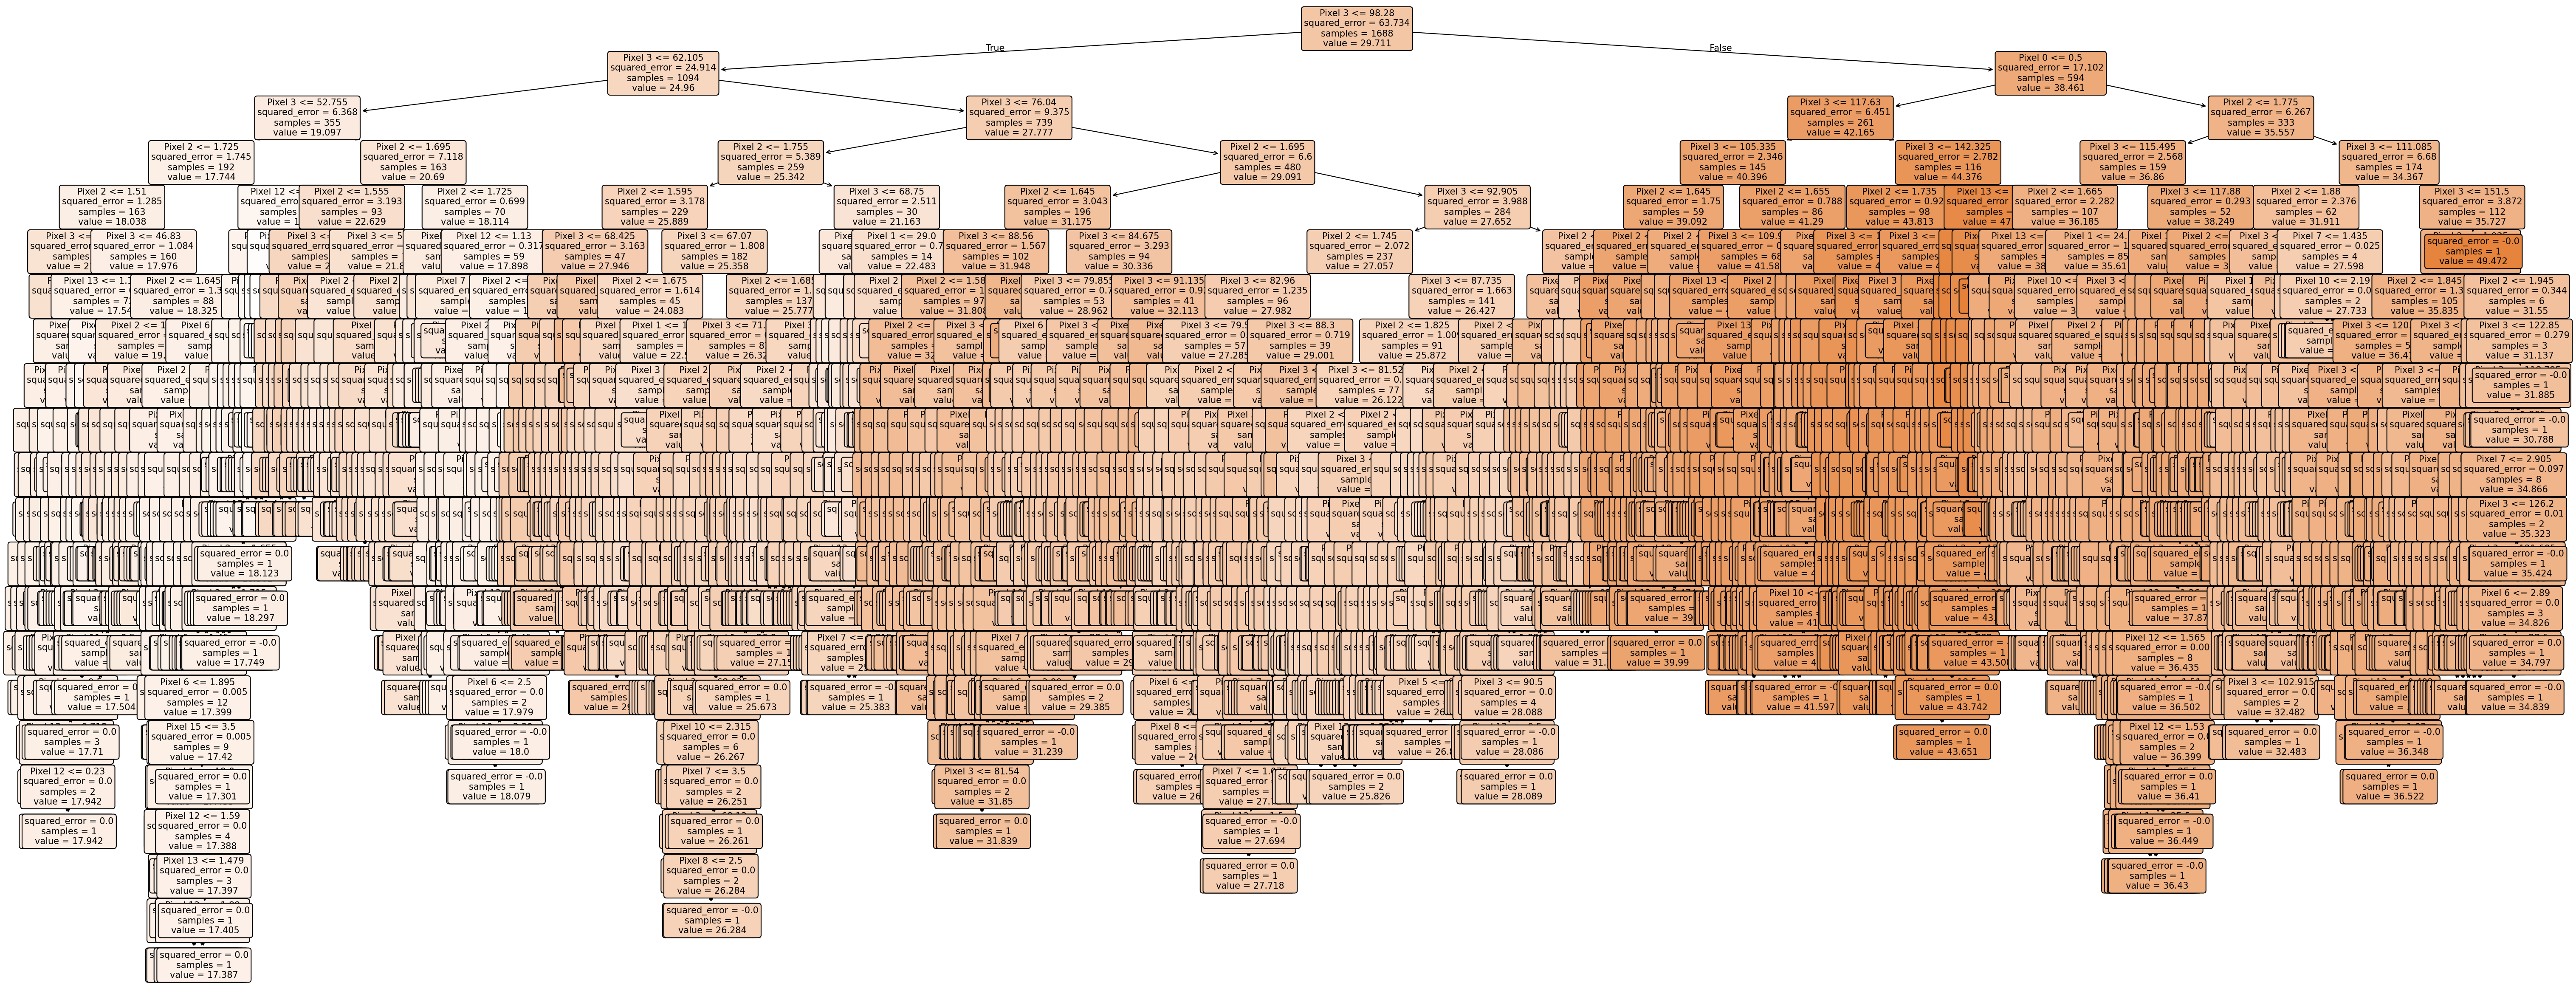

MAE (Error Absoluto Medio): 0.3633
MSE (Error Cuadrático Medio): 0.4218
RMSE (Raíz del Error Cuadrático Medio): 0.6494
R² (Coeficiente de Determinación): 0.9936


In [25]:
# Importar librerías necesarias
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de California Housing
data = fetch_california_housing()
X = df.drop(columns=["IMC","NObeyesdad"])  # Características
y =df["IMC"] # Etiquetas (precios de las casas)

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar el árbol de decisión
plt.figure(figsize=(50, 20), dpi=150)  # Ajuste de dpi para mejorar la resolución
tree.plot_tree(
    model, 
    filled=True, 
    feature_names=[f'Pixel {i}' for i in range(X.shape[1])], 
    class_names=[str(i) for i in range(10)],
    fontsize=10,  # Reducir el tamaño de fuente para mejor legibilidad
    rounded=True,  # Bordes redondeados para mayor claridad
    proportion=False  # Evitar que los nodos se expandan demasiado
)
plt.show()

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")